## Unicode Normalization: Canonical and Compatibility Equivalence



Unicode normalization is used to normalize different but similiar characters. For example the following unicode characters (and character combinations) are equivalent:

***Canonical Equivalence***

***Equivalence Reason***
* Ç	C◌̧	Combined character sequences
* 가	ᄀ ᅡ	Conjoined Korean characters
Compatibility equivalence

***Equivalence Reason***
- ℌ	H:	Font variant
- [NBSP]	[SPACE]:	Both are linebreak sequences
- ①	1:	Circled variant
- x²	x2:	Superscript
- xⱼ	xj:	Subscript
- ½	1/2:	Fractions



In [19]:
"Ç" == "Ç"



True

We have mentioned two different types of equivalence here, canonical and compatibility equivalence.

Canonical equivalence means both forms are fundamentally the same and when rendered are indistinguishable. For example we can take the unicode for 'Ç' \u00C7 or the unicode for 'C' \u0043 and '̧' \u0327, when the latter two characters are rendered together they look the same as the first character:

In [10]:
print("\u00C7", "\u0043"+"\u0327")


Ç Ç


However, if we print these characters seperately, we can see very clearly that they are not the same:

In [18]:
print("\u00C7", "\u0043", "\u0327")

Ç C ̧


These are examples of canonical equivalence, but we also have compatibility equivalence.

Compatibility equivalence refers to the formatting differences between characters, which includes (but is not limited to):

* font variants
* cursive forms
* circled characters
* width variation
* size changes
* rotation
* superscript and subscript
* fractions
- In this case we can see a difference between the rendered characters, for example between ℌ and H, or ½ and 1 ⁄ 2.

For many of these examples which are either canonical equivalents (Ç ↔ C ̧ ) or compatibility equivalents (½ → 1 ⁄ 2), if we compare if these different forms are equal, we will find that they are not:

In [20]:
"ℌ" == "H"

False

In [21]:
"½" == "1⁄2"  # note that 1⁄2 are the characters 1 ⁄ 2 placed together (they are automatically formatted)

False

## Decomposition and Composition

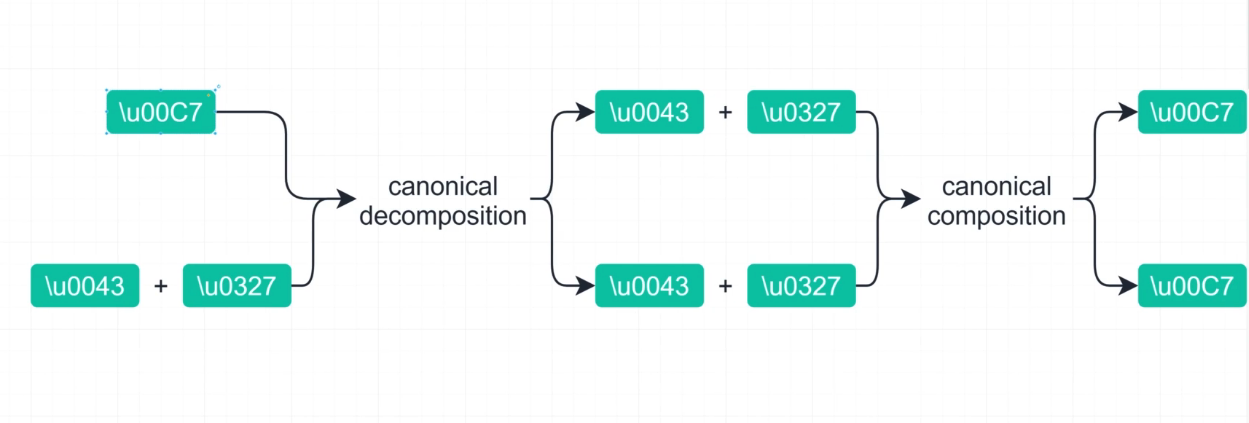

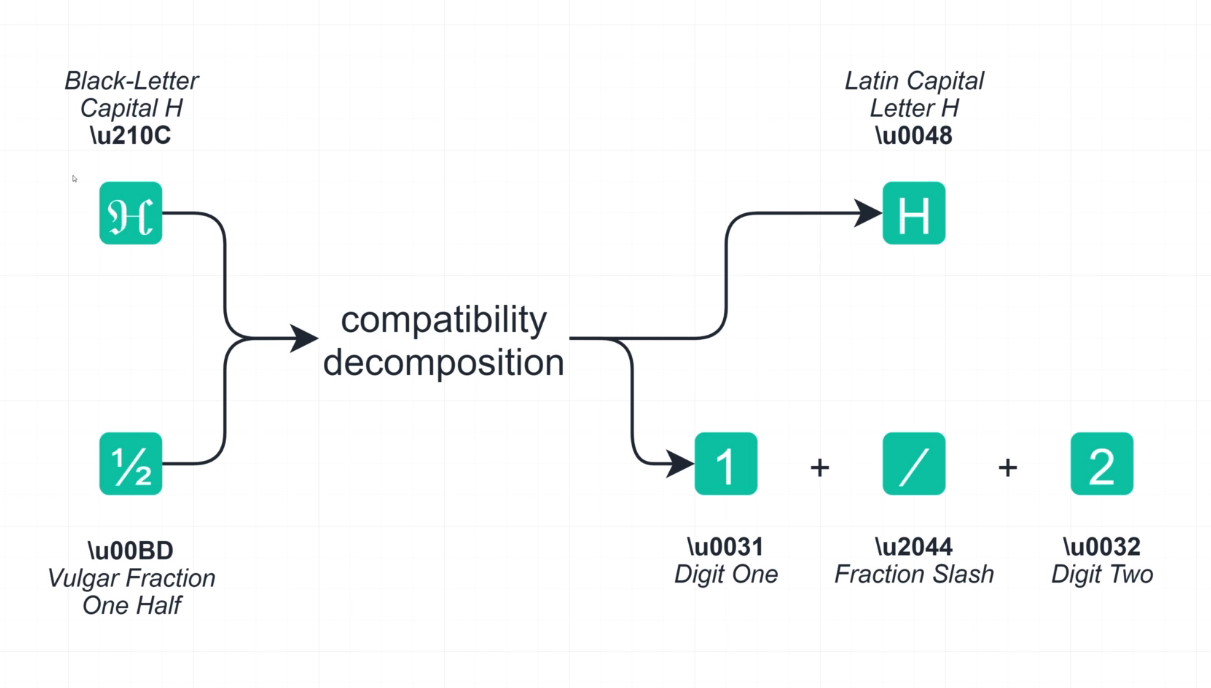

# Normal Forms

---------------------

So it is in these cases that we use unicode normalization to normalize our characters into matching pairs. As there are different forms of equivalence, there are also different forms of normalization. These are all called Normal Form, and there are four different methods:

- Name,	   Abbreviation,	  Description,	 Example,
- Form D:	NFD	Canonical decomposition	Ç → C ̧
- Form C:	NFC	Canoncial decomposition followed by canonical composition	Ç → C ̧ → Ç
- Form KD:	NFKD	Compatibility decomposition	ℌ ̧ → H ̧
- Form KC:	NFKC	Compatibility decomposition followed by canonical composition	ℌ ̧ → H ̧ → Ḩ



- Let's take a look at each of these forms in action. Our C with cedilla character Ç can be represented in two ways, as a single character called Latin capital C with cedilla (\u00C7), or as two characters called Latin capital C (\u0043) and combining cedilla (\u0327):

In [22]:
c_with_cedilla = "\u00C7"  # Latin capital C with cedilla (single character)
c_with_cedilla


     

'Ç'

In [23]:
c_plus_cedilla = "\u0043\u0327"  # \u0043 = Latin capital C, \u0327 = 'combining cedilla' (two characters)
c_plus_cedilla


'Ç'

- And we will find that these two version do not match when compared:

In [25]:
c_with_cedilla == c_plus_cedilla

False

- If we perform NFD on our C with cedilla character \u00C7, we decompose the character into it's smaller components, which are the Latin capital C character, and combining cedilla character \u0043 + \u0327. This means that if we compare an NFD normalized C with cedilla character to both the C character and the cedilla character, we will return true:

In [28]:
import unicodedata

In [29]:
unicodedata.normalize('NFD', c_with_cedilla) == c_plus_cedilla


True

- However, if we perform NFC on our C with cedilla character \u00C7, we decompose the character into the smaller components \u0043 + \u0327, and then compose them back to \u00C7, and so they will not match:

In [30]:
unicodedata.normalize('NFC', c_with_cedilla) == c_plus_cedilla


False

- But if we switch the NFC encoding to instead be performed on our two characters \u0043 + \u0327, they will first be decomposed (which will do nothing as they are already decomposed), then compose them into the single \u00C7 character:



In [31]:

c_with_cedilla == unicodedata.normalize('NFC', c_plus_cedilla)


True

* The NFK encodings do not decompose characters into smaller components, they decompose characters into their normal versions. For example if we take the fancy format ℌ \u210B, we cannot decompose this into multiple characters and so NFD or NFC encoding will do nothing. However, if we apply NFKD, we will find that our fancy ℌ \u210B becomes a plain, boring H \u0048:

In [32]:

unicodedata.normalize('NFKD', 'ℌ')

'H'

+ But, what if we merge our fancy ℌ \u210B with a combining cedilla \u0328 character?

In [33]:
"\u210B\u0327"

'ℋ̧'

* Applying our compatibility decomposition normalization (NFKD) gives us a capital H character, and a combining cedilla character as two seperate encodings:

In [34]:
unicodedata.normalize('NFKD', "\u210B\u0327").encode('utf-8')

b'H\xcc\xa7'

- Because the only difference between these two methods is a canonical composition, we see no difference between the two character sets when they are rendered:

In [35]:

unicodedata.normalize('NFKC', "\u210B\u0327"), unicodedata.normalize('NFKD', "\u210B\u0327"), 

('Ḩ', 'Ḩ')

Okay, that's it for unicode normalization. When it comes down to it, all you really need to remember is the table we saw above, all of this stuff is quite abstract and not the easiest thing to grasp or remember. So if it seems confusing, that's normal, you'll get by with our normal forms table.



Further Reading
UAX #15: Unicode Normalization Forms
https://unicode.org/reports/tr15/

UTR #15: Unicode Normalization
https://unicode.org/reports/tr15/tr15-18.html